# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 02</span>

Quest'esercitazione riguarda l'utilizzo dell'importance sampling come metodo di campionamento e la creazione di random walks.

## <span style="color:blue"> Esercizio 02.1 </span>

Per mostrare l'efficienza dell'importance sampling è stato calcolato il seguente integrale Monte Carlo con due metodi di campionamento differenti.
$$I = \int_0^1 f(x)dx = \int_0^1\frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. estraendo $x$ distribuite uniformemente tra [0,1]
2. approssimando $f(x)$ con un'altra distribuzione simile $d(x)$ la cui cumulativa è invertibile (importance sampling). In questo modo, estraendo $x$ distribuite secondo $d(x)$, l'integrale sarà calcolabile come:
$$I = \int_0^1 \frac{f(x)}{d(x)}dx = 1$$

La nuova distribuzione di probabilità scelta è:
$$d(x)=\frac{3}{2}(1-x^2)$$
normalizzata ad 1 per $x\in[0,1]$. Si è quindi trovata la cumulativa $F_x(x)=\frac{3}{2}(x-\frac{x^3}{3})$, la cui inversa risulta essere: $$x=2\sin\bigg(\frac{\arcsin(y)}{3}\bigg)$$
con $y$ uniformemente estratto tra $[0,1]$

Il plot riportato in seguito mostra i valori medi progressivi delle stime di $I$ calcolate attraverso $10^6$ estrazioni di $x$ divise in $100$ blocchi.

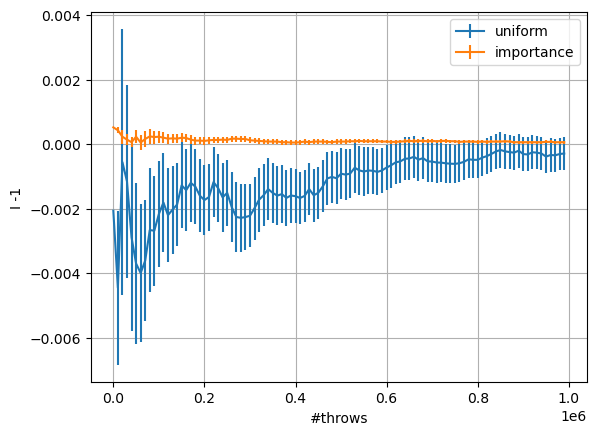

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)

# Carica i dati dal file
data_uni = np.loadtxt('1.uniform.out')
data_sampl = np.loadtxt('1.sampling.out')

x*=10000

plt.errorbar(x,data_uni[:,0]-1,yerr=data_uni[:,1], label='uniform')
plt.errorbar(x,data_sampl[:,0]-1,yerr=data_sampl[:,1], label='importance')
plt.xlabel('#throws')
plt.ylabel('I -1')
plt.grid(True)
plt.legend()
plt.show()

## <span style="color:blue"> Esercizio 02.2 </span>

Un random walk (RW) è un processo stocastico che descrive un percorso che consiste in una successione di passi ognuno compiuto in una direzione casuale tra quelle permesse dallo spazio matematico in cui è immerso.

Sono stati simulati $10^4$ RW di 100 passi lunghi $a=1$ ciascuno in due spazi diversi:
1. un reticolo cubico: i passi permessi sono in direzione $x$, $y$, $z$ e verso sia positivo che negativo.
2. in $\mathbb{R}^3$: tutte le direzioni sono permesse. Per selezionarla, è stato campionato uniformemente l'angolo solido con $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$

I RW sono divisi in 100 blocchi e per ognuno è stata calcolata  $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, ovvero la radice quadrata del valor medio della distanza dall'origine al passo N al quadrato.
I valori medi totali (quelli che considerano tutti i blocchi) con le loro incertezze statistiche sono riportati nei grafici che seguono.  Le curve sono state poi fittate con le funzioni $f(N)=k\sqrt{N}$ da cui si ricava che il parametro che meglio descrive i dati è $k=1$

### Reticolo cubico

/Applications/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:803: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/Applications/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:488: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/Applications/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


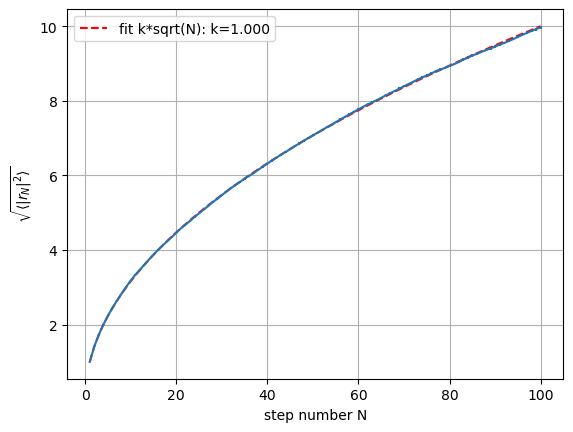

In [2]:
from scipy.optimize import curve_fit

def func(x, k):
    return k*np.sqrt(x)

x = np.arange(1,101)

# Carica i dati dal file
data = np.loadtxt('2.discrete_rw.out')

popt, pcov = curve_fit(func, x, data[:,0], sigma=data[:,1], absolute_sigma=True)

plt.errorbar(x, data[:,0], yerr=data[:,1])
plt.plot(x, func(x, *popt), 'r--', label='fit k*sqrt(N): k=%5.3f' % tuple(popt))
plt.xlabel('step number N')
plt.ylabel(r'$\sqrt{ \langle|r_N|^2 \rangle }$')
plt.grid(True)
plt.legend()
plt.show()

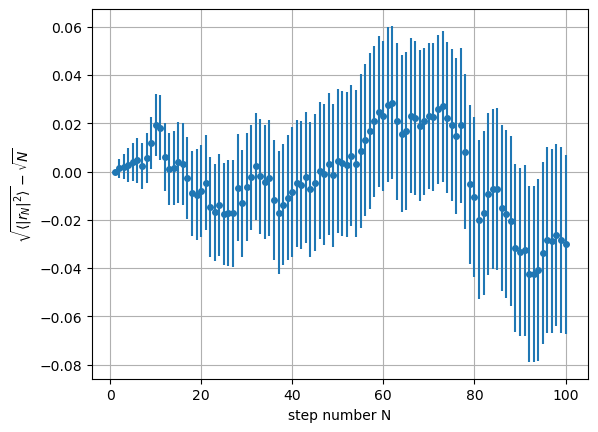

In [3]:
plt.errorbar(x, data[:,0] - np.sqrt(x), yerr=data[:,1], fmt='o', markersize=4)
plt.xlabel('step number N')
plt.ylabel(r'$\sqrt{ \langle|r_N|^2 \rangle }-\sqrt{N}$')
plt.grid(True)
plt.show()

### Spazio $\mathbb{R}^3$

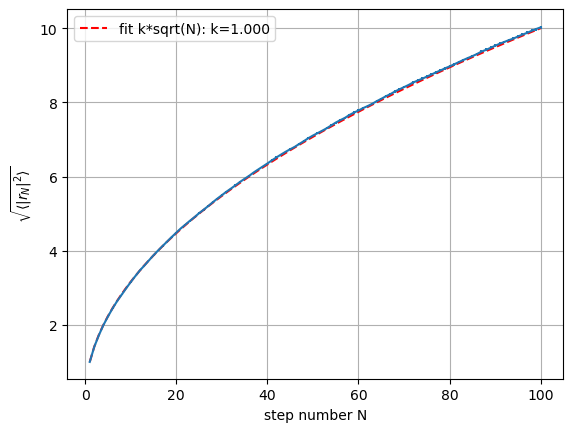

In [4]:
# Carica i dati dal file
data = np.loadtxt('2.continuous_rw.out')

popt, pcov = curve_fit(func, x, data[:,0], sigma=data[:,1], absolute_sigma=True)

plt.errorbar(x, data[:,0], yerr=data[:,1])
plt.plot(x, func(x, *popt), 'r--', label='fit k*sqrt(N): k=%5.3f' % tuple(popt))
plt.xlabel('step number N')
plt.ylabel(r'$\sqrt{ \langle|r_N|^2 \rangle }$')
plt.grid(True)
plt.legend()
plt.show()

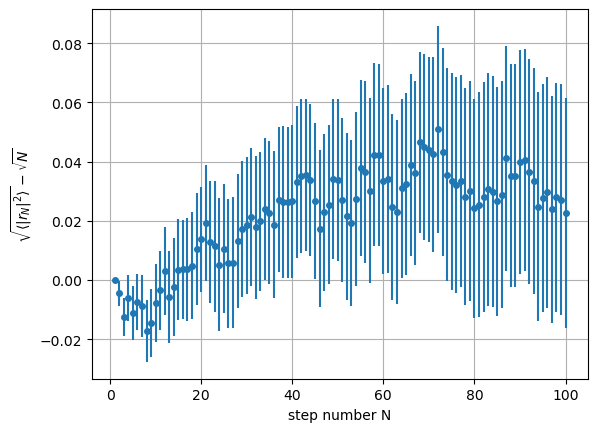

In [5]:
plt.errorbar(x, data[:,0] - np.sqrt(x), yerr=data[:,1], fmt='o', markersize=4)
plt.xlabel('step number N')
plt.ylabel(r'$\sqrt{ \langle|r_N|^2 \rangle }-\sqrt{N}$')
plt.grid(True)
plt.show()

## Comportamento diffusivo?

Come si può notare dai grafici delle differenze tra la curva della simulazione e la funzione di miglior fit, la deviazione stardard aumenta all'aumentare del numero del passo N: questo suggerisce che i RW sono un processo stocastico con un andamento diffusivo.